In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [5]:
df= pd.read_csv('Bengaluru_House_Data.csv')

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df2=df.drop(['area_type','availability','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df3=df2.dropna()

In [10]:
df3['balcony'].nunique()

4

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-12-4c4c73fbe7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [17]:
def convert(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df4= df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [19]:
df4[~df4['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk


In [20]:
df4['Price_per_sqft']= (df4['price']*100000)/df4['total_sqft']

In [21]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [22]:
df4.location = df4.location.apply(lambda x: x.strip())

In [23]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1017

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [26]:
df4['location']= df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
df4.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [27]:
len(df4['location'].unique())

238

In [28]:
df4.shape

(12710, 8)

In [29]:
df5 = df4[~((df4['total_sqft']/df4['bhk'])<300)]
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [30]:
df5.shape

(12055, 8)

In [31]:
def remove_prbased_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.Price_per_sqft)
        st=np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [32]:
df6 = remove_prbased_outlier(df5)
df6.shape

(9848, 8)

In [33]:
def scatter_plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

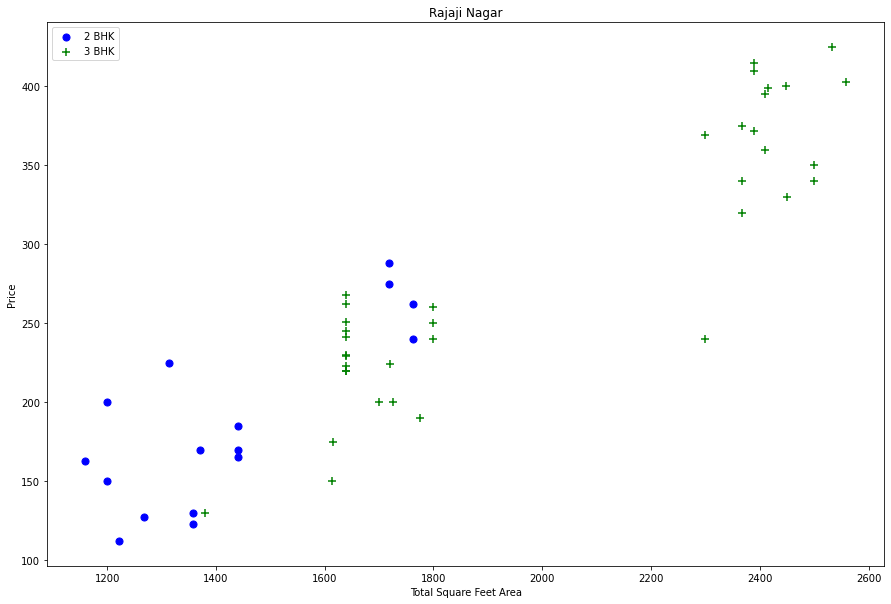

In [34]:
scatter_plot(df6,'Rajaji Nagar')

In [35]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.Price_per_sqft),
                'std':np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [36]:
df7 = remove_bhk_outliers(df6)

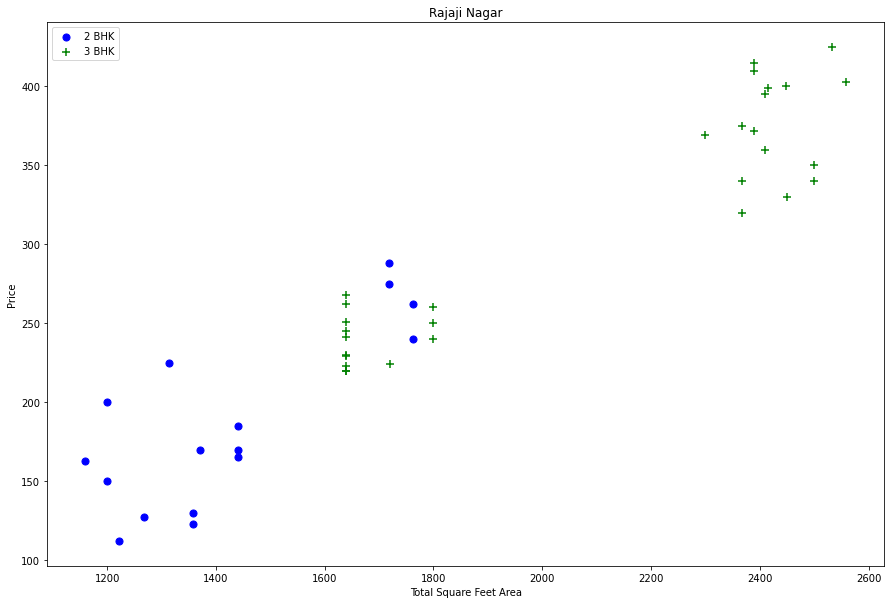

In [37]:
scatter_plot(df7,'Rajaji Nagar')

In [38]:
df7.shape

(7025, 8)

In [39]:
df7.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [40]:
df7[df7.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

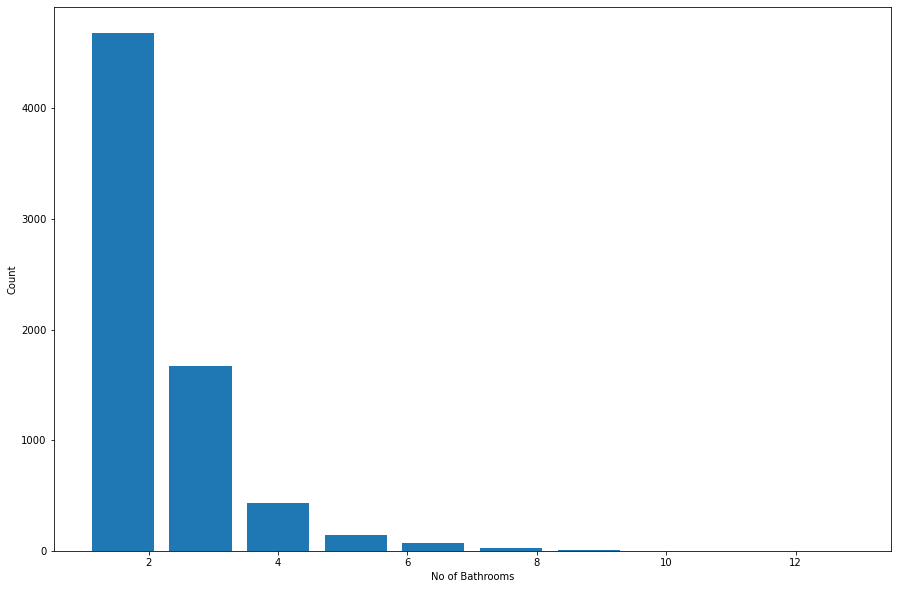

In [41]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("No of Bathrooms")
plt.ylabel("Count")

In [42]:
df8 = df7.drop(['size','Price_per_sqft'],axis='columns')

In [43]:
df8.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [44]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.head(3)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df10 = df9.drop('location',axis='columns')
df10.head(3)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df10.shape

(7025, 242)

In [48]:
X = df10.drop('price',axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Y = df10.price
Y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
lr.score(X_test,Y_test)

0.8683608930632798

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.764101  , 0.85529178, 0.86931248, 0.819856  , 0.87965489])

In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [56]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' :{
            'model' : LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores =[]
    cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.837643,{'normalize': False}
1,lasso,0.690084,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.700759,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [58]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [60]:
#def predict_price(location,sqft,bath,bhk):
    #loc_index = np.where(X.columns==location)[0][0]
    
    #x = np.zeros(len(X.columns))
    #x[0]=sqft
    #x[1]=bath
    #x[2]=bhk
    #if loc_index >= 0:
       #x[loc_index]=1
   # return lr.predict([X])[0]

In [63]:
#predict_price('1st Phase JP Nagar',1000,2,2)

In [64]:
import pickle 
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [65]:
import json
columns={
    'data_columns' :[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))